<a id='Top'/a>
# Class 11: Advanced Data Analysis
[Top of Notebook](#Top)

*** Learning Objectives: ***
Once again, the goal of the notebooks in this final week is to open your eyes to the possibilities and inspire you to continue to teach yourself Python on your own. Do not worry if you don't understand all of the data analysis techniques that are demonsrated here. In the last notebook we looked at some advanced ways of obtaining data. In this notebook we'll look at a few advanced data analysis techniques. In the final notebook we'll look at advanced data presentation.
    
In this class we will look at:
- [Statistics and Correlation](#Stats)
- [Image Processing](#Images)
- [Natural Language Processing](#Language)
- [Machine Learning](#Machine)
- [Student Challenge 1](#Student1)
- [Student Challenge 2](#Student2)

<a id='Stats' /a>
## Statistics and Correlation
[Top of Notebook](#Top)

Just for fun, and to illustrate the idea of spurious correlations, I asked students in one of my "Evil Plots" class the following set of random questions:

1.	How many hours a week do you spend on school assignments and studying?
2.	How much do you love math on a scale of 1-10 (1=would rather have my teeth drilled, 10=math problems are better than ice cream and kittens) 
3.	What day of the month were you born?
4.	What is your height in inches to the nearest inch?
5.	How many days did you spend at the beach this year?
6.	What is the most miles you’ve driven a car in a single day, ever?
7.	How many songs do you listen to in a day?
8.	How many slices of pizza did you eat in the past month (best estimate).
9.	How many states have you visited in your life? (Driving though or stopped in an airport count)
10.	How many letters are in your first and last name combined?

*** Let's load the data and look for correlations! ***

In [1]:
import pandas as pd
data =  pd.read_excel('RandomData.xlsx')
data

,HoursStudying,MathLove,BirthDay,HeightInches,BeachDays,DrivingMiles,SongsPerDay,PizzaSlices,StatesVisited,LettersInName
0,20.0,1,27,63,3,704.4,80.0,6,8,10
1,15.0,7,21,70,15,200.0,50.0,50,10,16
2,5.0,2,4,72,15,300.0,15.0,30,12,9
3,4.0,9,NaN,64,25,800.0,30.0,100,12,13
4,2.5,1,4,65,0,800.0,70.0,80,10,12
5,1.0,7,28,67,2,256.0,40.0,15,5,12
6,6.0,7,NaN,62,0,0.0,10.0,0,11,6
7,9.0,1,17,62,0,25.0,8.5,10,5,14
8,4.5,10,26,66,2,250.0,30.0,35,11,20
9,6.0,8,15,64,6,288.0,30.0,15,7,12


Some student just eat and incredible amount of pizza!

There is no reason to believe any of these data should be correlated. I mean, pizza consumption and letters in your name!? But let's take a look.

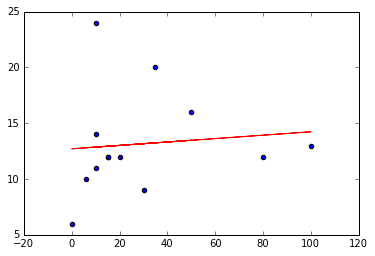

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Extract columns
x = data['PizzaSlices']
y = data['LettersInName']

# Fit a line to the data
fit = np.polyfit(x, y, deg=1)

# Create figure, plot line and data
fig, ax = plt.subplots()
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)

#data.plot.scatter('PizzaSlices', 'LettersInName')

No surprise here; it is not a very good correlation.  We could plot all the combination plotted against each other one at a time, but that would be tedious. Pandas to the rescue! (Again, don't worry about a few of the advanced tricks in the code.)

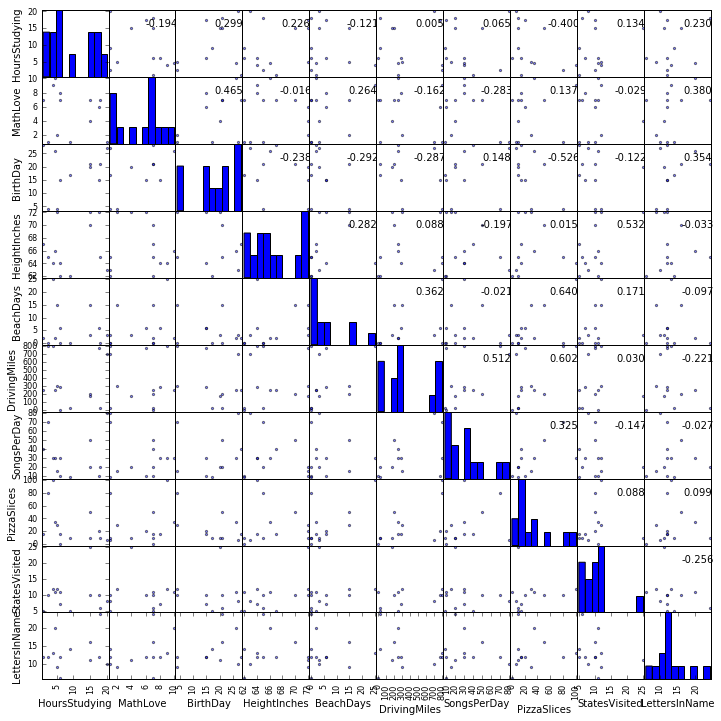

In [3]:
# Create a matrix of scatter plots by looping over all the columns
axes = pd.scatter_matrix(data, diagonal='hist', figsize=(12,12))
corr = data.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

1 = perfect correlation, 0 = no correlation at all.

Most of the correlation coeffecients are very low, as expected.  The strongest correlation is 0.64.  Let's take a closer look at that one.

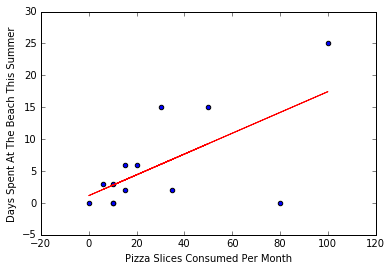

In [4]:
# Extract columns
x = data['PizzaSlices']
y = data['BeachDays']

# Fit a line to the data
fit = np.polyfit(x, y, deg=1)

# Create figure, plot line and data
fig, ax = plt.subplots()
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.xlabel('Pizza Slices Consumed Per Month')
plt.ylabel('Days Spent At The Beach This Summer')

#data.plot.scatter('PizzaSlices', 'LettersInName')

This is when your brain starts thinking, "Hmmm.  Maybe people who eat a lot of pizza are the type who laze around on the beach all summer." More likely, this is just a spurious correlation. If you plot enough things against each other you're bound to find some that correlation.  Here is a really fun book on [spurious correlations](http://tylervigen.com/spurious-correlations). Click on the link and look at a few of the examples.

But I digress.  The point was that we just did a pretty sophisticated data analysis of the correlations between ten different variables with only a few lines of code.

**Whether you're a scientist analysing experimental results, a business analyst summarizing stock trends, or a sociologist evaluating risk factors for children, being able to power through your data like this gives you a superpower beyond the imagination of puny mortals! With enough Python you can take over the world.  MU HA HA HA!**

(Sorry. Forgot to take my meds this morning.)

<a id='Student1' /a>
## Student Challenge 1
[Top of Notebook](#Top)

Try plotting one of the other combinations, such as love of math versus number of songs listened to per day. Include the regression line.

<a id='Images' /a>
## Image Processing
[Top of Notebook](#Top)

The second form of advanced data analysis we'll explore is image analysis. Here is and image of geology disrupted by faulting. 

!['Rolled Beds'](https://pbs.twimg.com/profile_images/229857411/SanAndreas.jpg)

You can see the sediment bedding, normally horizontal, has been distorted. But to extract the bedding from the image we can use a technique called "edge detection." **Let's see if we can enhance the boundaries between the layers.**

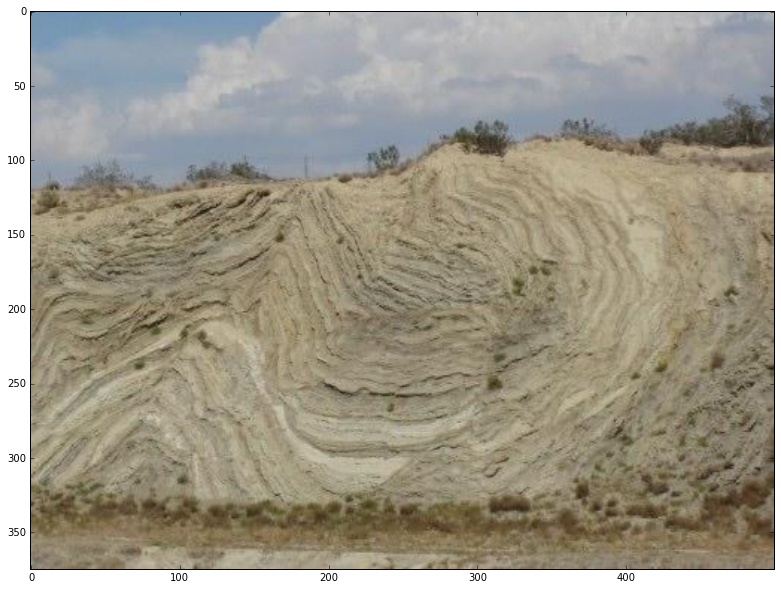

In [5]:
import matplotlib.pyplot as plt
from skimage import io

# Load the image from the URL (web address)
photo = io.imread('https://pbs.twimg.com/profile_images/229857411/SanAndreas.jpg')
plt.figure(figsize=(20,10)) 
plt.imshow(photo)

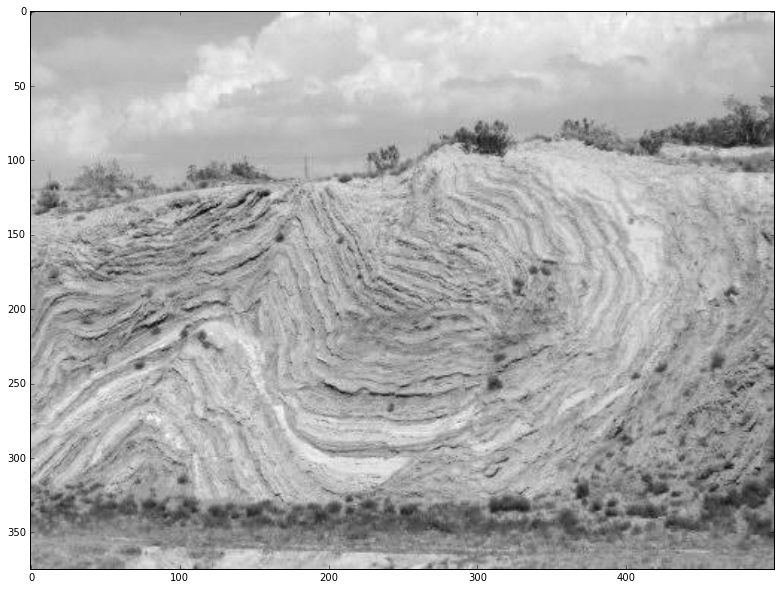

In [6]:
from skimage.color import rgb2gray

# Convert the image from color to grayscale
img_gray = rgb2gray(photo)
plt.figure(figsize=(20,10)) 
imgplot = plt.imshow(img_gray, cmap='gray')

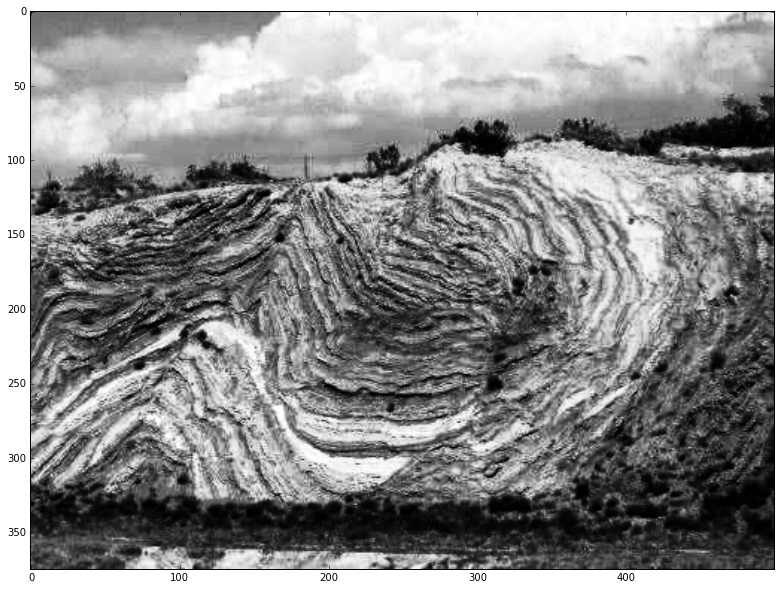

In [7]:
# Adjust the colors by equalizing the image histogram, this increases the contrast
# see: http://scikit-image.org/docs/dev/auto_examples/plot_equalize.html)

from skimage import exposure

img_eq = exposure.equalize_hist(img_gray)
plt.figure(figsize=(20,10)) 
imgplot = plt.imshow(img_eq, cmap='gray')

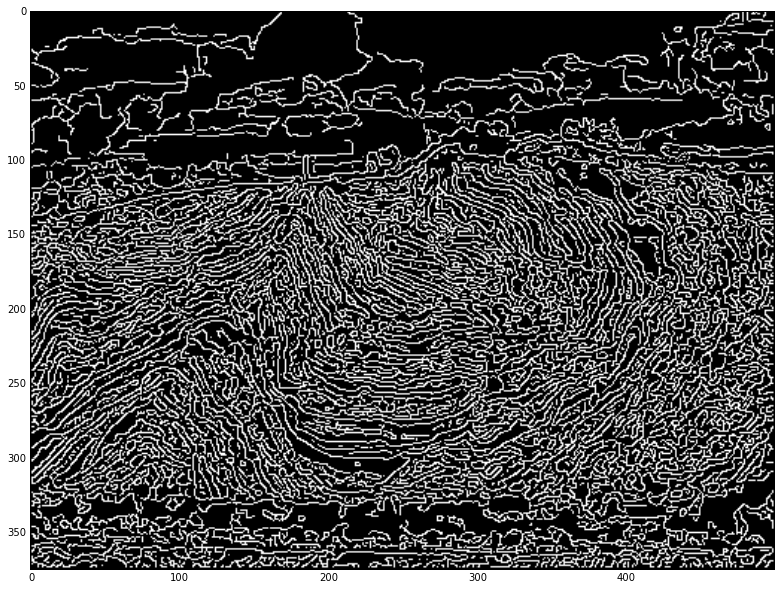

In [8]:
from skimage import feature

# Use the Canny filter to find the edges.
# http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py

edges = feature.canny(img_eq)
plt.figure(figsize=(20,10)) 
imgplot = plt.imshow(edges, cmap='gray')

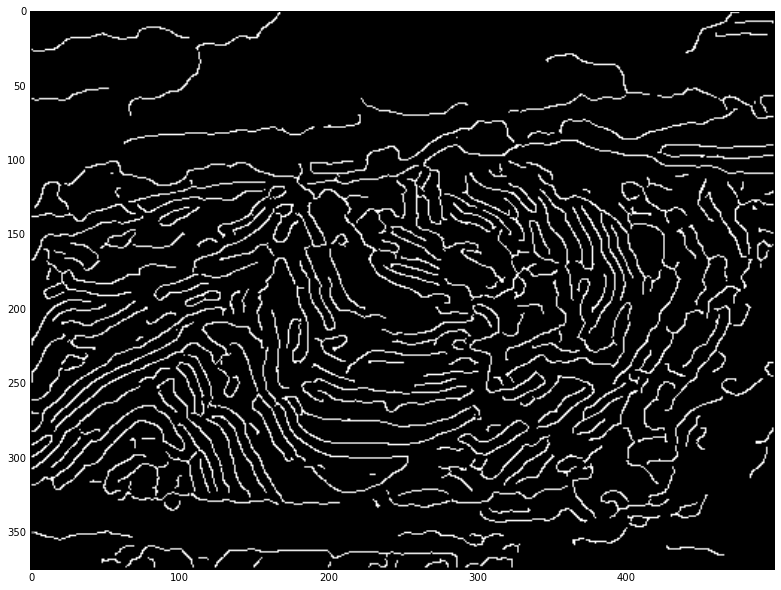

In [9]:
# If we only want to see the strongest edges we can up the threshold to only flag boundaries that
# are serveral standard deviation above the background
edges2 = feature.canny(img_eq, sigma=3)
plt.figure(figsize=(20,10)) 
imgplot = plt.imshow(edges2, cmap='gray')

** Books and books have been written on image process.  Python has many modules to help. **

<a id='Language' /a>
## Natural Language Processing
[Top of Notebook](#Top)

**A picture is worth a thousand words.** But sometimes you have to work with words not pictures. Most people know computers can be used to analyze images, but text? Yes, there is a lot of research in this areas as well, that goes way beyond just finding out how many times the word "NASA" appears in a newspaper article. Just as processing images is critical to problems such as computer vision and robotics. Teaching a computer to process text is part of the quest for artificial intellegence. 

Text processing is used for many tasks, such as:
* sentiment analysis
* spam filtering
* plagarism detection
* document categorization
* phrase extraction
* smarter searches
* keyword analysis


**Let's get a glimpse of natural language processing with Python.**

First, we need some text...

In [10]:
quote = '''LOG ENTRY: SOL 381 I’ve been thinking about laws on Mars. 

Yeah, I know, it’s a stupid thing to think about, but I have a lot of free time. 

There’s an international treaty saying no country can lay claim to anything that’s not on Earth. 
And by another treaty, if you’re not in any country’s territory, maritime law applies. 

So Mars is “international waters.” 

NASA is an American nonmilitary organization, and it owns the Hab. So while I’m in the Hab, American 
law applies. As soon as I step outside, I’m in international waters. Then when I get in the rover, I’m 
back to American law. 

Here’s the cool part: I will eventually go to Schiaparelli and commandeer the Ares 4 lander. Nobody 
explicitly gave me permission to do this, and they can’t until I’m aboard Ares 4 and operating the 
comm system. After I board Ares 4, before talking to NASA, I will take control of a craft in international 
waters without permission. 

That makes me a pirate! 

A space pirate!'''

### Tokenizing
Let's take the quote above and using Python's natural language toolkit we'll "tokenize" it. This breaks the quote into lists of substrings and punctuation.

In [11]:
import nltk
tokens = nltk.word_tokenize(quote)

In [12]:
print(tokens)

['LOG', 'ENTRY', ':', 'SOL', '381', 'I’ve', 'been', 'thinking', 'about', 'laws', 'on', 'Mars', '.', 'Yeah', ',', 'I', 'know', ',', 'it’s', 'a', 'stupid', 'thing', 'to', 'think', 'about', ',', 'but', 'I', 'have', 'a', 'lot', 'of', 'free', 'time', '.', 'There’s', 'an', 'international', 'treaty', 'saying', 'no', 'country', 'can', 'lay', 'claim', 'to', 'anything', 'that’s', 'not', 'on', 'Earth', '.', 'And', 'by', 'another', 'treaty', ',', 'if', 'you’re', 'not', 'in', 'any', 'country’s', 'territory', ',', 'maritime', 'law', 'applies', '.', 'So', 'Mars', 'is', '“international', 'waters.”', 'NASA', 'is', 'an', 'American', 'nonmilitary', 'organization', ',', 'and', 'it', 'owns', 'the', 'Hab', '.', 'So', 'while', 'I’m', 'in', 'the', 'Hab', ',', 'American', 'law', 'applies', '.', 'As', 'soon', 'as', 'I', 'step', 'outside', ',', 'I’m', 'in', 'international', 'waters', '.', 'Then', 'when', 'I', 'get', 'in', 'the', 'rover', ',', 'I’m', 'back', 'to', 'American', 'law', '.', 'Here’s', 'the', 'cool', 

In [13]:
# Break the quote apart by sentences.
sentences = nltk.tokenize.sent_tokenize(quote)

# Print each sentence with a black line in between.
for sentence in sentences:
    print(sentence)
    print()

LOG ENTRY: SOL 381 I’ve been thinking about laws on Mars.

Yeah, I know, it’s a stupid thing to think about, but I have a lot of free time.

There’s an international treaty saying no country can lay claim to anything that’s not on Earth.

And by another treaty, if you’re not in any country’s territory, maritime law applies.

So Mars is “international waters.” 

NASA is an American nonmilitary organization, and it owns the Hab.

So while I’m in the Hab, American 
law applies.

As soon as I step outside, I’m in international waters.

Then when I get in the rover, I’m 
back to American law.

Here’s the cool part: I will eventually go to Schiaparelli and commandeer the Ares 4 lander.

Nobody 
explicitly gave me permission to do this, and they can’t until I’m aboard Ares 4 and operating the 
comm system.

After I board Ares 4, before talking to NASA, I will take control of a craft in international 
waters without permission.

That makes me a pirate!

A space pirate!



You're probably not impressed. Splitting on sentences just means looking for periods, right? Not really. You have to look for question marks, exclamation points and sentences where the period is inside the quotes.  It's trickier than it sounds.

But wait, there's more.  NLTK also know parts of speech. Is a given word a noun, a verb, a proposition?

Here are what some of the tags mean:

!['Tags'](https://s19.postimg.org/fobhhb9s3/Tagging.jpg)

In [14]:
from nltk import pos_tag
pos_tag(tokens)

[('LOG', 'JJ'),
 ('ENTRY', 'NNP'),
 (':', ':'),
 ('SOL', 'NNP'),
 ('381', 'CD'),
 ('I’ve', 'NNP'),
 ('been', 'VBN'),
 ('thinking', 'VBG'),
 ('about', 'IN'),
 ('laws', 'NNS'),
 ('on', 'IN'),
 ('Mars', 'NNP'),
 ('.', '.'),
 ('Yeah', 'UH'),
 (',', ','),
 ('I', 'PRP'),
 ('know', 'VBP'),
 (',', ','),
 ('it’s', 'VBP'),
 ('a', 'DT'),
 ('stupid', 'JJ'),
 ('thing', 'NN'),
 ('to', 'TO'),
 ('think', 'VB'),
 ('about', 'IN'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('free', 'JJ'),
 ('time', 'NN'),
 ('.', '.'),
 ('There’s', 'NNP'),
 ('an', 'DT'),
 ('international', 'JJ'),
 ('treaty', 'NN'),
 ('saying', 'VBG'),
 ('no', 'DT'),
 ('country', 'NN'),
 ('can', 'MD'),
 ('lay', 'VB'),
 ('claim', 'NN'),
 ('to', 'TO'),
 ('anything', 'NN'),
 ('that’s', 'RP'),
 ('not', 'RB'),
 ('on', 'IN'),
 ('Earth', 'NNP'),
 ('.', '.'),
 ('And', 'CC'),
 ('by', 'IN'),
 ('another', 'DT'),
 ('treaty', 'NN'),
 (',', ','),
 ('if', 'IN'),
 ('you’re', 'VBN'),
 ('not'

In [15]:
#from nltk.chunk import ne_chunk
#ne_chunk(pos_tag(tokens))

<a id='Machine' /a>
## Machine Learning
[Top of Notebook](#Top)

Every time you shop on Amazon, or browse for movies on NetFlix, the site offers recommendations based on your previous orders or browser history. The machine is learning about you.
&nbsp;

&nbsp;
  

![Netflix](https://www.mapr.com/sites/default/files/blogimages/architecture-recommendation-engine.png)
&nbsp;

&nbsp;

When you cute kitten pictures Google images, how on earth does the computer learn which of the millions of images on the web have cats? Machine learning again.
&nbsp;

&nbsp;

![Puss](https://s-media-cache-ak0.pinimg.com/originals/d3/e9/fc/d3e9fc222c9bd0d12e0ff126acf7df00.png)
&nbsp;

&nbsp;

How does your email program know to put the latesst plea for help from that Nigerian prince with the frozen bank account into your spam folder?  You guessed it. Machine learning.

![Prince](https://media.licdn.com/mpr/mpr/shrinknp_800_800/AAEAAQAAAAAAAAQpAAAAJDYwZWNjN2Q2LTkwNmQtNDZjNS04ZDc0LTY1MWY1YjkwMzhhNA.png)
&nbsp;

&nbsp;

**Most applications of machine learning fall into one of three categories:**
1. Regression - where you use data to predict something.
2. Supervised Classification (clustering) - where the computer learn to classsify stuff based on examples provided.
3. Unsupervised Classification - where the computer sorts things into groups it thinks are similar in some way.

Python as a machine learning module called skikit-learn that implements many different algorithms for all three types of problems. Machine learning is a huge field, and I'm no expert, so we will just look at a simple example to get an idea of how it works.

We will look at a case of unsupervised classification. The basic goals it to sort things into categories based on a list of traits. You want things put in the same category to be more similar to each other than to things in other categories. The categories will be determined as you go along. You probably did something like this as a kid, sorting pebbles into different piles, or organizing your toys. Okay, well your mom probably did that.

A common algorithm that is used is called [k-means.](https://en.wikipedia.org/wiki/K-means_clustering)

**Let's apply this algorithm to the questions I asked my "Evil Plots" class.**

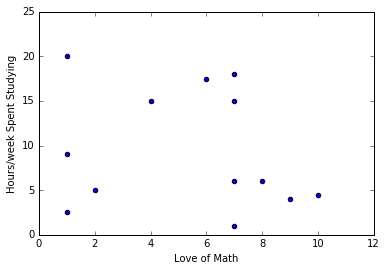

In [16]:
import pandas as pd
data =  pd.read_excel('RandomData.xlsx')
plt.scatter(data['MathLove'], y=data['HoursStudying'])
plt.xlabel('Love of Math')
plt.ylabel('Hours/week Spent Studying')

There is clearly not much correlation between the student's love of math and the number of hours per week they report spend studying. But are there clusters? That is, are there groups of students that tend to answer the same way to both questions? To the human eye there appear to be three clusters: one group of three students clusters in the lower left corner of the graph that hates math and spents little time studying, one group that also likes math and spends little time studying, and one group that that feels so-so about math and studies a lot. There is also one oddball who really hates math but studies more than anyone else.

Let's not get carried away interpreting these clusters. We only have sample size of 13 students. What we want to know is whether or not computers can spots these same clusters.

Because in a typical data set some categories (called attributes) have larges numbers (driving miles) and others have small number(math love), a common  preprocessing step is to scale each attribute to have a similar range so that the attributes with large numbers don't dominate when we combine data. This is called "standarizing the data." We subtract the average so the data will be centered on zero and divide by the standard deviation so the numbers will have similar ranges.

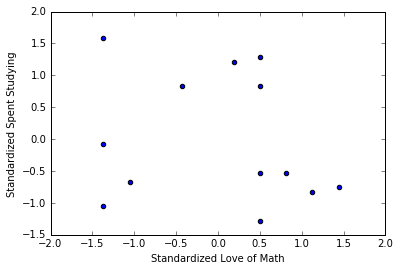

In [17]:
# Normalize the data
data_standardized = (data - data.mean()) / data.std()

plt.scatter(data_standardized['MathLove'], y=data_standardized['HoursStudying'])
plt.xlabel('Standardized Love of Math')
plt.ylabel('Standardized Spent Studying')

In [18]:
data_standardized.head()

,HoursStudying,MathLove,BirthDay,HeightInches,BeachDays,DrivingMiles,SongsPerDay,PizzaSlices,StatesVisited,LettersInName
0,1.582186,-1.369096,1.093019,-0.911061,-0.378177,1.145319,2.112565,-0.768266,-0.421263,-0.675360
1,0.828764,0.504404,0.364340,0.931306,1.174338,-0.504597,0.797481,0.682058,-0.030090,0.609472
2,-0.678080,-1.056846,-1.700252,1.457697,1.174338,-0.177492,-0.736785,0.022820,0.361083,-0.889499
3,-0.828764,1.128903,NaN,-0.647865,2.468100,1.458031,-0.079242,2.330153,0.361083,-0.032944
4,-1.054790,-1.369096,-1.700252,-0.384670,-0.766305,1.458031,1.674204,1.670915,-0.030090,-0.247083


The same information is plotted, but now it each attribute has a mean of zero and a standard devation of one. The units on the graph are now standard deviaions from the mean.

Just to be clear, what we are doing is asking the computer to look for natural groups within these 13 students. We'll see if we can divide them into three clusters. The Kmeans algorithm we'll be testing does this by looking for groups where each member is closer to the average of the group than it is to members of other groups, which is pretty much what we would use as the definition of a cluster.

In [19]:
# Had to install sklearn module
# pip3.5 install --user sklearn
from sklearn.cluster import KMeans

cols = ['MathLove', 'HoursStudying']
data4cluster = data_standardized[cols]
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data4cluster)

In [20]:
# The three groups are identified as 0, 1 and 2.
data['kmeans']=kmeans
data.head()

,HoursStudying,MathLove,BirthDay,HeightInches,BeachDays,DrivingMiles,SongsPerDay,PizzaSlices,StatesVisited,LettersInName,kmeans
0,20.0,1,27,63,3,704.4,80,6,8,10,0
1,15.0,7,21,70,15,200.0,50,50,10,16,0
2,5.0,2,4,72,15,300.0,15,30,12,9,2
3,4.0,9,NaN,64,25,800.0,30,100,12,13,1
4,2.5,1,4,65,0,800.0,70,80,10,12,2


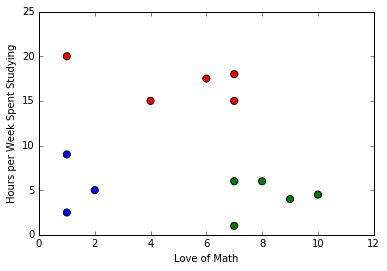

In [21]:
# Create a matrix of scatter plots by looping over all the columns
# Define colors list, to be used to plot groups: red (=0), green (=1) or blue (=2)
colors=['red','green','blue']
col = []
for ind in kmeans:
    col.append(colors[ind])
plt.scatter(data['MathLove'], data['HoursStudying'], c=col, s=50)
plt.xlabel('Love of Math')
plt.ylabel('Hours per Week Spent Studying')

The computer found the expected clusters. The one oddball in the upper left was designated as part of the feels so-so about math and studies a lot, despite having a really strong aversion to math. That is because we told the computer to find exactly three groups. This choice of the number of clusters to create is always a question.

What if you were told to divide this bunch into exactly two groups?  How would you cluster them? Let's see what the algorithm does.

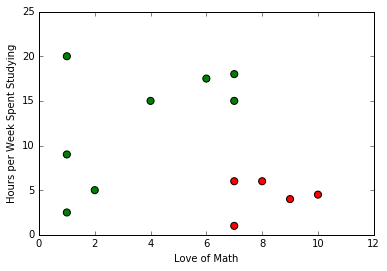

In [22]:
# Force the data into two clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(data4cluster)

colors=['red','green']
col = []
for ind in kmeans:
    col.append(colors[ind])
plt.scatter(data['MathLove'], data['HoursStudying'], c=col, s=50)
plt.xlabel('Love of Math')
plt.ylabel('Hours per Week Spent Studying')

For two clusters you should be able to draw a line that divides the two populations. You can see where the line would go in this case, but other divisions are possible.

### Take-home Message
This example demostrated how you can using a computer algorithm to divided people into different categories based on measured attributes. We did a very simple example with only two attributes, math and studying, but the computer could just as easily have used hundreds of factors. It could have been a lengthy questionaire about your preferences in and idea mate as part of a dating service, your political views to target you for campaign contributions, or you web browsing history to bombard you with advertisements "your cluster" is deemed most likely to click on.

Many more sophisticated algorithms are continually sifting through your data without human guidance. As you sign away more and more of your personal data in exchange for convenient, free applications, the machines are learning all your hopes, fears, and deep, dark secrets. If you listen closely, somewhere in the endless binary stream of ones and zeros you can hear whispered laughter.

<a id='Student2' /a>
## Student Challenge 2
[Top of Notebook](#Top)

See what happens if you divide the data into four clusters. You will need to add another color to the list to plot the results. [Here is a list](http://matplotlib.org/api/colors_api.html) of the colors that are predefined in matplotlib.